In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
%pylab inline
import seaborn as sns
sns.set(style="ticks")

Populating the interactive namespace from numpy and matplotlib


In [36]:
#set parameters
make = 'audi'
model = 'a3'
postcode = 'w1h1pg'
radius = '10'
price_to = '10000'
page = 1

#establish number of pages in result set
url = ('http://www.autotrader.co.uk/search/used/cars/%s/%s/postcode/%s/radius/%s/price-to/%s/onesearchad/used/sort/default/page/%s/searchcontext/default')%(make, model, postcode, radius, price_to, page)
x = requests.get(url)
soup = BeautifulSoup(x.text, 'html.parser')

pages = []
for i in soup.find('li', class_ = "paginationMini__count").find_all('strong'):
    pages.append(int(i.string))

In [37]:
#initiate master dataframe
master = []

for q in range(pages[0], pages[1] + 1):
    
    page = q
    url = ('http://www.autotrader.co.uk/search/used/cars/%s/%s/postcode/%s/radius/%s/price-to/%s/onesearchad/used/sort/default/page/%s/searchcontext/default')%(make, model, postcode, radius, price_to, page)
    x = requests.get(url)
    soup = BeautifulSoup(x.text, 'html.parser')
    
    for k in range(0, len(soup.find_all('article', class_ = 'search-result '))):
        ad = soup.find_all('article', class_ = 'search-result ')[k]

        #create list of ad attributes
        attributes = []
        attributes.append(ad.find('h1', class_ = "search-result__title").text)

        #add price to list
        attributes.append(ad.find_all('div', class_= "search-result__price")[0].string)

        #add additional attributes
        for i in ad.find_all('ul', class_="search-result__attributes")[0].find_all('li')[-7:]:
            attributes.append(i.string)

        #add seller details to list
        for i in ad.find_all('p', class_= "search-result__seller-details")[0].find_all('strong'):
            attributes.append(i.string)

        master.append(attributes)
    print 'page ' + str(q)

page 1
page 2
page 3
page 4
page 5
page 6
page 7
page 8
page 9
page 10
page 11
page 12
page 13
page 14
page 15
page 16
page 17
page 18
page 19
page 20
page 21
page 22
page 23


In [95]:
df = pd.DataFrame(master)
df.columns = ['model', 'price', 'year', 'type', 'mileage', 'transmission', 'engine_size', 'hp', 'fuel', 'seller_type', 'distance']
df = df.dropna()

In [96]:
#strip out text and convert columns to numerical values
df.mileage = pd.to_numeric(df.mileage.str.replace(',| miles', ''))
df.price = pd.to_numeric(df.price.str.replace('\\xa3|,', ''))
df.year = pd.to_numeric(df.year.str.replace(' \(.*\)', ''))
df.engine_size = pd.to_numeric(df.engine_size.str.replace('L', ''))
df.hp = pd.to_numeric(df.hp.str.replace(' bhp', ''))
df.distance = pd.to_numeric(df.distance.str.replace(' miles| mile', ''))
df['petrol'] = pd.get_dummies(df.fuel)['Petrol']
df['private'] = pd.get_dummies(df.seller_type)['Private seller']
df['manual'] = pd.get_dummies(df.transmission)['Manual']
df = pd.concat([df, pd.get_dummies(df.model.str[-3], prefix = 'doors')], axis = 1)

In [97]:
df

,model,price,year,type,mileage,transmission,engine_size,hp,fuel,seller_type,distance,petrol,private,manual,doors_3,doors_5
0,Audi A3 1.8 Sport 3dr,300,1999,Hatchback,115000,Manual,1.8,125,Petrol,Private seller,5,1.0,1.0,1.0,1.0,0.0
1,Audi A3 1.8 SE 3dr,500,1999,Hatchback,112000,Manual,1.8,125,Petrol,Trade seller,7,1.0,0.0,1.0,1.0,0.0
2,Audi A3 1.9 TDI 3dr,580,2000,Hatchback,134000,Manual,1.9,90,Diesel,Private seller,7,0.0,1.0,1.0,1.0,0.0
3,Audi A3 1.6 SE 5dr,595,2001,Hatchback,130000,Manual,1.6,101,Petrol,Trade seller,6,1.0,0.0,1.0,0.0,1.0
4,Audi A3 1.9 TDI SE 5dr,599,2000,Hatchback,222000,Manual,1.9,90,Diesel,Private seller,7,0.0,1.0,1.0,0.0,1.0
5,Audi A3 1.8 Sport 3dr,600,1997,Hatchback,49600,Manual,1.8,125,Petrol,Private seller,8,1.0,1.0,1.0,1.0,0.0
6,Audi A3 1.8 T Sport 3dr,634,2001,Hatchback,174000,Manual,1.8,150,Petrol,Private seller,8,1.0,1.0,1.0,1.0,0.0
7,Audi A3 1.8 SE 3dr,640,2002,Hatchback,128000,Manual,1.8,125,Petrol,Private seller,7,1.0,1.0,1.0,1.0,0.0
8,Audi A3 1.9 TDI SE 3dr,695,2002,Hatchback,210000,Manual,1.9,100,Diesel,Trade seller,6,0.0,0.0,1.0,1.0,0.0
9,Audi A3 1.6 SE 3dr,790,2001,Hatchback,109000,Manual,1.6,101,Petrol,Trade seller,6,1.0,0.0,1.0,1.0,0.0


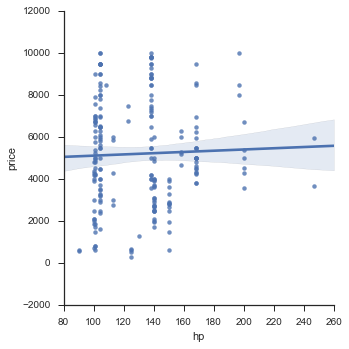

In [101]:
sns.lmplot('hp', 'price', data=df)

In [16]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [98]:
results = smf.ols('price ~ mileage + hp + year + doors_3 + doors_5 + petrol + private + manual', data=df).fit()

# Inspect the results
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     222.0
Date:                Sat, 16 Apr 2016   Prob (F-statistic):           4.35e-93
Time:                        19:28:09   Log-Likelihood:                -1775.9
No. Observations:                 217   AIC:                             3568.
Df Residuals:                     209   BIC:                             3595.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -8.065e+05   3.53e+04    -22.864      0.0